## **Características de Haralick - Maria Jimena Vargas López**

In [102]:
import os
import random
from IPython.display import display, Image
from google.colab import drive
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

%pip install mahotas
import mahotas.features.texture as mht

Mounted at /content/drive
Displaying image from class: Adenanthera microsperma


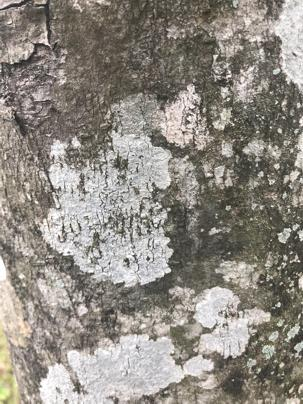

Displaying image from class: Cananga odorata


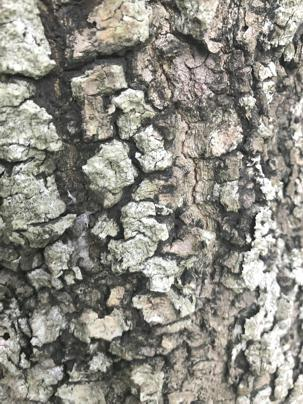

Displaying image from class: Carica papaya


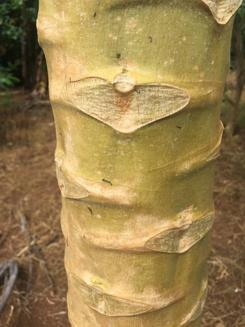

Displaying image from class: Cocos nucifera


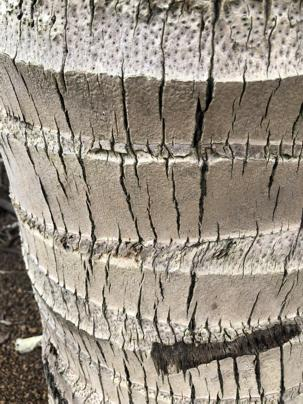

In [1]:
# google drive
drive.mount('/content/drive')

# Ruta de los datos
data_path = '/content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/DATOS'
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Mostrar una imagen aleatoria por cada clase
for class_name in classes:
    class_dir = os.path.join(data_path, class_name)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    if images:
        random_image = random.choice(images)
        image_path = os.path.join(class_dir, random_image)
        print(f"Displaying image from class: {class_name}")
        display(Image(filename=image_path))
    else:
        print(f"No images found for class: {class_name}")

In [101]:

# Iterar en cada clase
for class_name in classes:
    class_dir = os.path.join(data_path, class_name)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    if images:
        print(f"Converting images in class: {class_name} to grayscale...")
        for image_name in images:
            image_path = os.path.join(class_dir, image_name)
            try:
                img = Image.open(image_path)
                grayscale_img = img.convert('L')
            except Exception as e:
                print(f"Could not process image {image_name}: {e}")
    else:
        print(f"No images found for class: {class_name}")

print("Grayscale conversion complete.")

Converting images in class: Adenanthera microsperma to grayscale...
Converting images in class: Cananga odorata to grayscale...
Converting images in class: Carica papaya to grayscale...
Converting images in class: Cocos nucifera to grayscale...
Grayscale conversion complete.


In [4]:


def calculate_haralick_features(image):
    """
Calcula 14 características de textura Haralick para una imagen en escala de grises a 0, 45, 90 y 135 grados.

Argumentos:
imagen: Una imagen en escala de grises como un array NumPy.

Devuelve:
Un array NumPy que contiene las características Haralick calculadas para todos los ángulos.
La forma del array será (4, 14), donde cada fila corresponde a un ángulo (0, 45, 90, 135) y cada columna a una característica.
    """

    haralick_features = mht.haralick(image, compute_14th_feature=True)
    return haralick_features

In [5]:

results = []

# Iterar en cada clase
for class_name in classes:
    class_dir = os.path.join(data_path, class_name)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    if images:
        print(f"Processing images in class: {class_name}")
        for image_name in images:
            image_path = os.path.join(class_dir, image_name)
            try:
                img = Image.open(image_path).convert('L')
                img_array = np.array(img)
                haralick_features = calculate_haralick_features(img_array)

                # Almacenar resultados para todos los ángulos
                result_entry = {
                    'Image': image_name,
                    'Class': class_name
                }
                # Aplanar las características para todos los ángulos y agregarlas al diccionario
                for i, angle in enumerate([0, 45, 90, 135]):
                    for j, feature_name in enumerate(['Angular Second Moment', 'Contrast', 'Correlation', 'Sum of Squares: Variance', 'Inverse Difference Moment', 'Sum Average', 'Sum Variance', 'Sum Entropy', 'Entropy', 'Difference Variance', 'Difference Entropy', 'Information Measure of Correlation 1', 'Information Measure of Correlation 2', 'Maximum Correlation Coefficient']):
                        result_entry[f'{feature_name}_{angle}'] = haralick_features[i, j]

                results.append(result_entry)
            except Exception as e:
                print(f"Could not process image {image_name}: {e}")
    else:
        print(f"No images found for class: {class_name}")

# Organizar los datos en un dataframe
df = pd.DataFrame(results)

print("Feature calculation complete.")
display(df.head())

Processing images in class: Adenanthera microsperma
Processing images in class: Cananga odorata
Processing images in class: Carica papaya
Processing images in class: Cocos nucifera
Feature calculation complete.


,Image,Class,Angular Second Moment_0,Contrast_0,Correlation_0,Sum of Squares: Variance_0,Inverse Difference Moment_0,Sum Average_0,Sum Variance_0,Sum Entropy_0,...,Inverse Difference Moment_135,Sum Average_135,Sum Variance_135,Sum Entropy_135,Entropy_135,Difference Variance_135,Difference Entropy_135,Information Measure of Correlation 1_135,Information Measure of Correlation 2_135,Maximum Correlation Coefficient_135
0,IMG_5786.JPG,Adenanthera microsperma,0.000083,737.920341,0.867068,2775.562995,0.063727,278.392523,10364.331639,8.505332,...,0.051871,278.363688,10030.277333,8.485997,14.247690,0.000063,6.025673,-0.115125,0.908053,7.110400
1,IMG_5783.JPG,Adenanthera microsperma,0.000058,957.351911,0.819200,2647.550220,0.048882,264.595420,9632.848970,8.603050,...,0.039160,264.590809,9076.251383,8.567656,14.644887,0.000046,6.317605,-0.089813,0.864698,8.320716
2,IMG_5785.JPG,Adenanthera microsperma,0.000079,711.777047,0.868819,2712.958908,0.059965,280.416235,10140.058586,8.519809,...,0.048866,280.223259,9822.532132,8.498876,14.269732,0.000062,6.013380,-0.115580,0.909013,7.310315
3,IMG_5781.JPG,Adenanthera microsperma,0.000064,949.894376,0.792813,2292.361141,0.050604,306.222895,8219.550188,8.470810,...,0.041499,306.205199,7793.387453,8.439629,14.455586,0.000050,6.244289,-0.083925,0.847428,7.824754
4,IMG_5778.JPG,Adenanthera microsperma,0.000072,748.528449,0.861523,2702.715559,0.063121,288.710289,10062.333786,8.579537,...,0.051274,288.680155,9673.017307,8.555632,14.366105,0.000060,6.075204,-0.117022,0.912309,7.561521


In [6]:
# Guardar el DataFrame en un archivo CSV
output_csv_path = "/content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/haralick_features_all_angles.csv"
df.to_csv(output_csv_path, index=False)
print(f"\nDataFrame guardado exitosamente en: {output_csv_path}")


DataFrame guardado exitosamente en: /content/drive/MyDrive/VISIÓN POR COMPUTADORA/TALLER 3/haralick_features_all_angles.csv


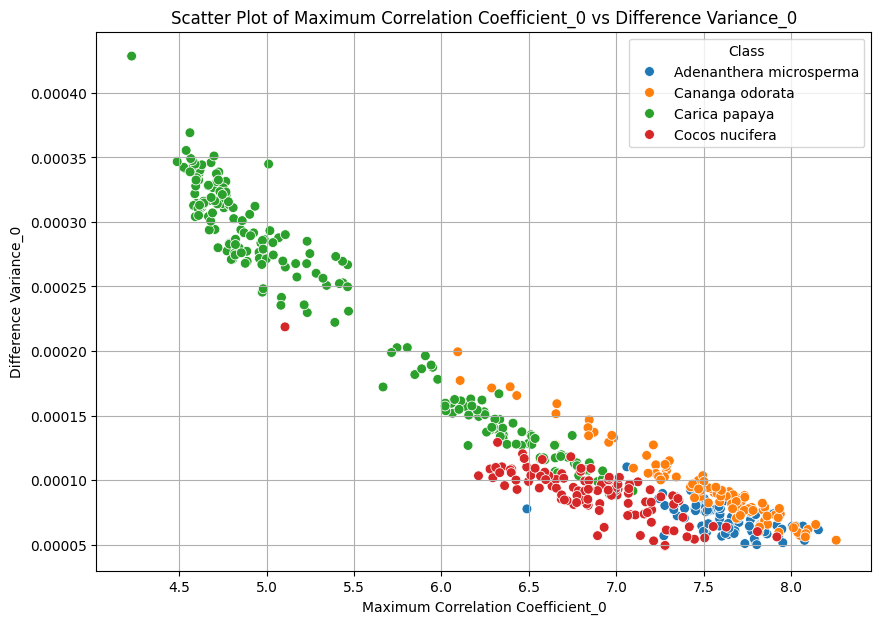

In [100]:


# Define las características a graficar por sus nombres
feature_x_name = 'Maximum Correlation Coefficient_0'
feature_y_name = 'Difference Variance_0'

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x=feature_x_name, y=feature_y_name, hue='Class', s=50)
plt.title(f'Scatter Plot of {feature_x_name} vs {feature_y_name}')
plt.xlabel(feature_x_name)
plt.ylabel(feature_y_name)
plt.grid(True)
plt.show()

/tmp/ipython-input-346411780.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_images_df = df.groupby('Class').apply(lambda x: x.nlargest(2, selected_feature_name)).reset_index(drop=True)


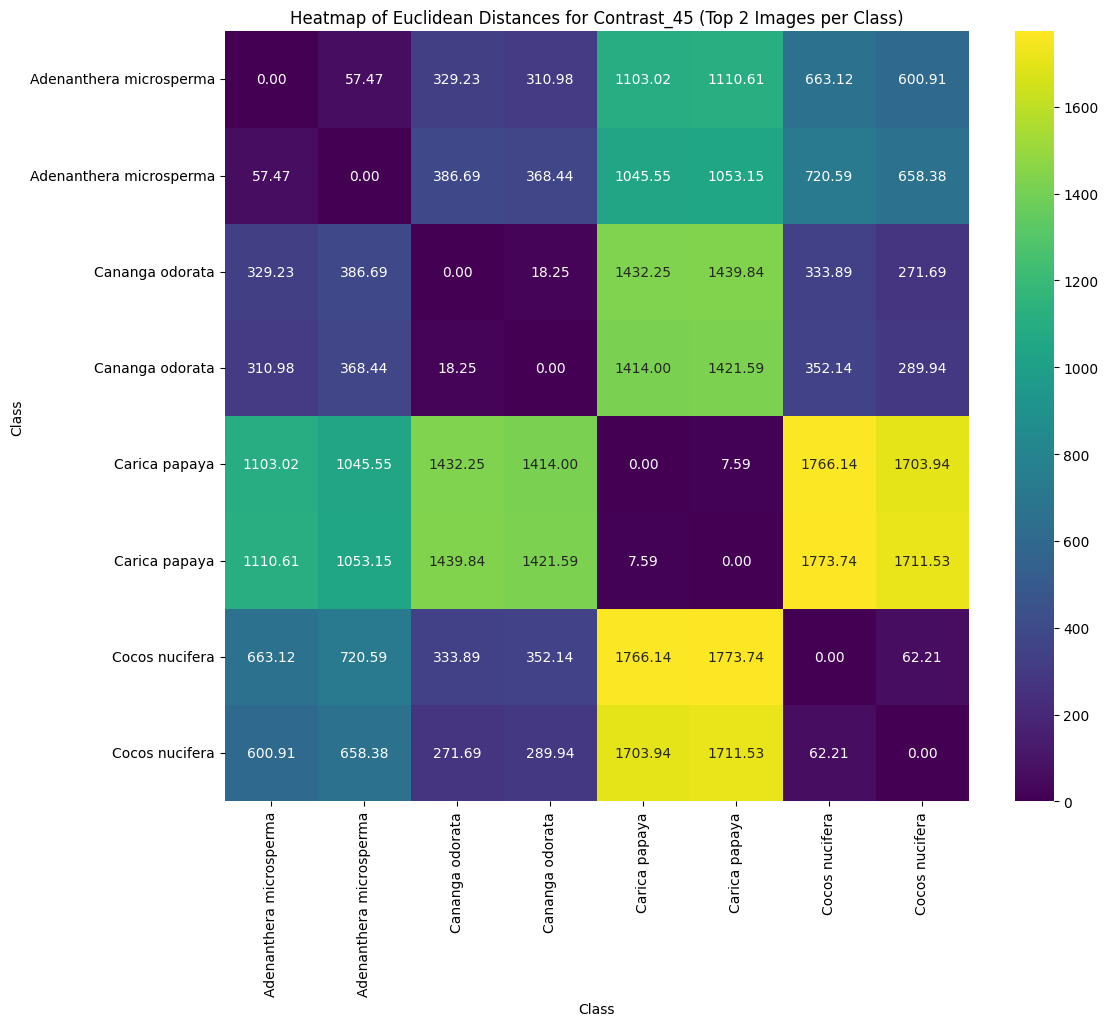

In [81]:

# Definiendo la característica de Haralick a utilizar para el heatmap
selected_feature_name = 'Contrast_45'

# Seccionar las 2 imágenes con el valor más alto en la característica seleccionada
selected_images_df = df.groupby('Class').apply(lambda x: x.nlargest(2, selected_feature_name)).reset_index(drop=True)

# Extraer los valores y labels
feature_values = selected_images_df[selected_feature_name].values
image_labels = selected_images_df['Class'].values

# Reformar la matriz de valores de características para que sea una matriz 2D con una columna
feature_values_reshaped = feature_values.reshape(-1, 1)

# Calcular las sitancias euclidianas
distance_matrix = pairwise_distances(feature_values_reshaped, metric='euclidean')

# Determinar el formato basado en el rango de los valores de distancia.
if np.max(distance_matrix) < 1 and np.max(distance_matrix) != 0:
    fmt = ".2e"  # Notación científica para número pequeños
else:
    fmt = ".2f"  # Notación normal para número grandes

#Configuración del heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, annot=True, cmap='viridis', fmt=fmt, xticklabels=image_labels, yticklabels=image_labels)
plt.title(f"Heatmap of Euclidean Distances for {selected_feature_name} (Top 2 Images per Class)")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()